# **Importing Libraries & Loading Data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt                               # To visualize
import pandas as pd                                           # To read data
from sklearn.linear_model import LinearRegression

df = pd.read_csv('SLR.csv')                                     # load data set
df.head(6)

,Year,Population
0,1980,2.1
1,1985,2.9
2,1990,3.2
3,1995,4.1
4,2000,4.9
5,2005,NaN


**Here, We will be predicting Population of Year 2005**

Just for convenience, we have included it in our dataset. But we will train our model with data 0-4 index then predict value of 5th index

# Using Matrix
---
Formula, 

a.png

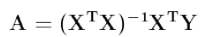

c.png

slope, m = 0.136, intercept, c = -267.20

Predicted Values:
[2.08 2.76 3.44 4.12 4.8 ]

R^2: 98.13%

Population of 2005 = 5.48



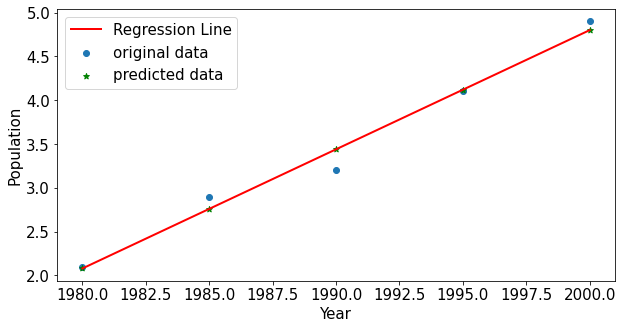

In [26]:
a = np.array(df.Year)
b = df.Population
predictValue = np.array(a[-1:])                                                 # Seperating value of 5th index
a = a[:-1]                                                                      # Removing 5th index
b = b[:-1]                                                                      # Removing 5th index
m = np.shape(a)
a2 = np.matrix([np.ones(m), a]).T
b2 = np.matrix(b).T 
p_mat = np.array(np.linalg.inv(a2.T.dot(a2)).dot(a2.T).dot(b2))                 #coefficinets

# We know for linear regression there is only one inpute attribute and one output attribute
# that's why we have done this manually without using loop

print("slope, m = %.3f, intercept, c = %.2f\n" %(p_mat[1], p_mat[0]))           # Showing coefficients 

b3 = p_mat[0] + (p_mat[1] * a)                                                  # Calculating y_hat
print('Predicted Values:')
print(b3)

# Calculating R^2 value
SSE = sum((b - b3.T) ** 2)
SST = sum((b - np.mean(b)) ** 2)
RSquared = (1 - (SSE / SST)) * 100 
print('\nR^2: %.2f' %RSquared + '%')

p = p_mat[0] + (p_mat[1] * predictValue)
print('\nPopulation of %d = %.2f\n' %(predictValue, p))                         # Predicintg population for year 2005
# # # Plot data, regression line
plt.figure(figsize=(10, 5))
plt.rc('font', size=15) 
plt.xlabel("Year")
plt.ylabel("Population")  
plt.scatter(a, b, label='original data')                                        # Plotting Original Data
plt.scatter(a, b3, label='predicted data', marker='*', color='green')           # Plotting Predicted Data
plt.plot(a, b3, color='red', label='Regression Line', LineWidth='2')            # Drawing Regression Line
plt.legend() 

# **Regression Line, R^2 Value, Predicted Value Using Raw Code(Single Variable).**

slope, m = -267.200, intercept, c = 0.136
SSE: 0.088
SST:  [4.712]
R^2: 98.13%
Predicted Population = 5.48



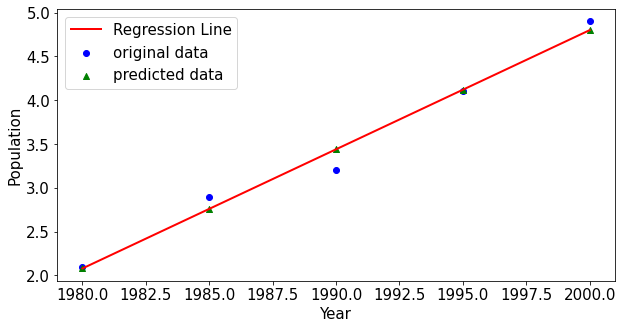

In [24]:
n = len(x)
sumOfx = sum(x)
sumOfy = sum(y)
mean_x = sumOfx/float(n)
mean_y = sumOfy/float(n)

sumOfxx = 0
sumOfxy = 0
for i in range(len(x)):
 sumOfxx += x[i] * x[i]
for i in range(len(x)):
 sumOfxy += x[i] * y[i]

up = 0.0
up = sumOfxy - ( (sumOfx * sumOfy) / float(n) )
down = 0.0
down = sumOfxx - ( (sumOfx * sumOfx) / float(n) )
b = 0.0
b = up / down
a = 0.0
a = mean_y - (b * mean_x)
print('slope, m = %.3f, intercept, c = %.3f' % (a, b))

y_hat = []
for i in x:
  y_hat.append((b * i) + a)
SSE = 0.0
SST = 0.0
for i in range(len(y_hat)):
  SSE += (y[i] - y_hat[i]) ** 2
  SST += (y[i] - mean_y) ** 2
print('SSE: %.3f' % (SSE))
print('SST: ', SST)
R_square = (1 - (SSE / SST)) * 100
print('R^2: %.2f' % (R_square) + '%')
predicted_population = a + (b * predictValue)
print('Predicted Population = %.2f\n' % (predicted_population))

plt.figure(figsize=(10, 5))
plt.rc('font', size=15) 
plt.xlabel("Year")
plt.ylabel("Population")
plt.scatter(x, y, label='original data', color='blue')
plt.scatter(x, y_hat, label='predicted data', marker='^', color='green')  # Plotting Predicted Data
plt.plot(x, y_hat, color='red', label='Regression Line', LineWidth='2') 
plt.legend()
plt.show()